<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>Lab 11: Clustering (Distance based methods)</b></h3></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

# Pre-processing

In [2]:
data=pd.read_csv("kidney_disease.csv")

In [3]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Data Cleaning

In [7]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [8]:
data.drop('id',axis=1,inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [9]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [10]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [11]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [12]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [14]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [15]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

### Missing values.

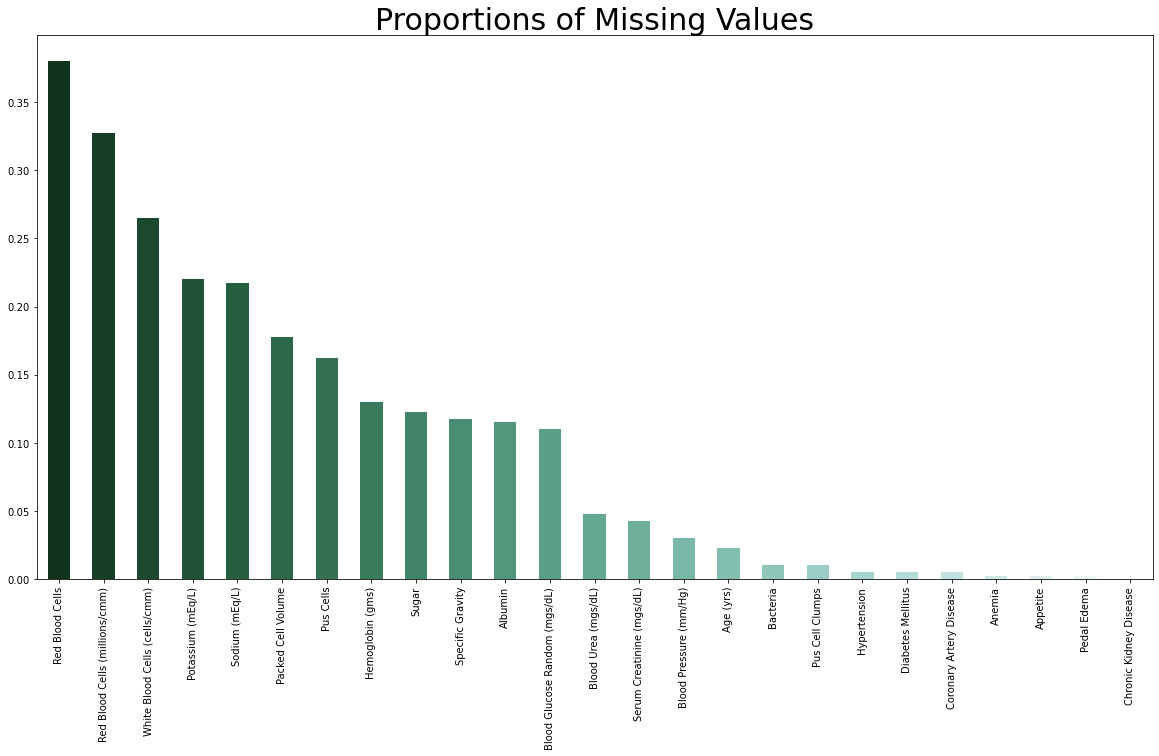

In [17]:
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("Proportions of Missing Values",fontsize=30)
plt.show()

### One-Hot Encoding

In [18]:
onehotdata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
onehotdata.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


In [19]:
names={}
for name in data.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(data.loc[i,name])!=str:
                    if math.isnan(data.loc[i,name]):
                        onehotdata.loc[i,ohname]=data.loc[i,name]

In [20]:
test_oh_dt=pd.DataFrame(columns=data.columns)
for col in test_oh_dt.columns:
    if col in categoricals:
        test_oh_dt[col]=onehotdata[names[col]]
    elif col=='Chronic Kidney Disease':
        test_oh_dt[col]=onehotdata['Chronic Kidney Disease: yes']
    else:
        test_oh_dt[col]=onehotdata[col]

In [21]:
((pd.isna(data)==pd.isna(test_oh_dt))==False).sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
dtype: int64

In [22]:
onehotdata = onehotdata.dropna()

# Clustering & Prediction

## Prediction Using K-Means Clustering

In [23]:
X=onehotdata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
Y=onehotdata["Chronic Kidney Disease: yes"]

In [24]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
full_scaled_data=SS.fit_transform(onehotdata)
scaled_data=SS.fit_transform(X)

In [30]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)

In [31]:
%%time 
kmeans.fit(scaled_data)

CPU times: user 26.2 ms, sys: 2.54 ms, total: 28.8 ms
Wall time: 26.6 ms


KMeans(n_clusters=3)

In [32]:
kmeans.cluster_centers_

array([[-0.15445122, -0.16911787,  0.44876369, -0.47738467, -0.30195563,
        -0.3444883 , -0.39088907, -0.40536639,  0.35967669, -0.09187447,
         0.46935585,  0.46813602, -0.19709218,  0.42880966,  0.30611133,
         0.43108347, -0.28248028, -0.28669109, -0.4830789 , -0.44227194,
        -0.2735506 , -0.36971698, -0.38069349, -0.33567254],
       [ 0.28311864,  0.85088089, -1.21099636,  1.60533398,  0.26815332,
         0.41453793,  2.02100866,  2.05534435, -1.68943784,  0.68198116,
        -1.88535474, -1.90282977,  0.4341898 , -1.68806717, -0.75229095,
        -1.65322933,  1.13717038,  0.15739903,  1.48031053,  0.76829252,
         0.41983435,  1.43880572,  1.03459055,  2.58912131],
       [ 0.65338713,  0.27757948, -1.58403357,  1.42835634,  1.50838427,
         1.63292623,  0.5975972 ,  0.65252918, -0.68765519, -0.02708304,
        -1.15579387, -1.13467697,  0.77475407, -1.08381033, -1.14021015,
        -1.12500564,  0.69360656,  1.51081654,  1.56210423,  1.90531716,
  

#### Evaluation Metrics

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [34]:
print(confusion_matrix(onehotdata['Chronic Kidney Disease: yes'],kmeans.labels_)) 
print(classification_report(onehotdata['Chronic Kidney Disease: yes'],kmeans.labels_))

[[115   0   0]
 [  5  17  21]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       115
           1       1.00      0.40      0.57        43
           2       0.00      0.00      0.00         0

    accuracy                           0.84       158
   macro avg       0.65      0.47      0.52       158
weighted avg       0.97      0.84      0.87       158



### Advantages
- Relatively simple to implement.
- Scales to large data sets.
- Guarantees convergence.
- Can warm-start the positions of centroids
- Easily adapts to new examples.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.


### Disadvantages
- Choosing k manually.
- Being dependent on initial values. Clustering data of varying sizes and density.
- Clustering outliers.
- Scaling with number of dimensions.

## Prediction Using  K-Median Clustering

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [36]:
from sklearn_extra.cluster import KMedoids

In [37]:
kmedoids = KMedoids(n_clusters=4)

In [38]:
%%time
kmedoids.fit(onehotdata.drop('Chronic Kidney Disease: yes',axis=1))

CPU times: user 23.9 ms, sys: 2.82 ms, total: 26.7 ms
Wall time: 9.23 ms


KMedoids(n_clusters=4)

In [39]:
kmedoids.cluster_centers_

array([[4.900e+01, 8.000e+01, 1.020e+00, 0.000e+00, 0.000e+00, 1.220e+02,
        3.200e+01, 1.200e+00, 1.390e+02, 3.900e+00, 1.700e+01, 4.100e+01,
        5.600e+03, 4.900e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.000e+01, 9.000e+01, 1.010e+00, 2.000e+00, 0.000e+00, 1.280e+02,
        2.080e+02, 9.200e+00, 1.340e+02, 4.800e+00, 8.200e+00, 2.200e+01,
        1.630e+04, 2.700e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [4.100e+01, 8.000e+01, 1.025e+00, 0.000e+00, 0.000e+00, 1.120e+02,
        4.800e+01, 7.000e-01, 1.400e+02, 5.000e+00, 1.700e+01, 5.200e+01,
        7.200e+03, 5.800e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [7.100e+01, 7.000e+01, 1.020e+00, 0.000e+00, 0.000e+00, 8.100e+01,
        1.800e+01, 8.000e-01, 1.450

#### Evaluation Metrics

In [40]:
print(confusion_matrix(onehotdata['Chronic Kidney Disease: yes'],kmedoids.labels_)) 
print(classification_report(onehotdata['Chronic Kidney Disease: yes'],kmedoids.labels_))

[[30  0 46 39]
 [ 8 10  9 16]
 [ 0  0  0  0]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           0       0.79      0.26      0.39       115
           1       1.00      0.23      0.38        43
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.25       158
   macro avg       0.45      0.12      0.19       158
weighted avg       0.85      0.25      0.39       158



#### Advantages-

- It is simple to understand and easy to implement.
- K-Medoid Algorithm is fast and converges in a fixed number of steps. 
- PAM is less sensitive to outliers than other partitioning algorithms.


#### Disadvantages-
- The main disadvantage of K-Medoid algorithms is that it is not suitable for clustering non- spherical (arbitrary shaped) groups of objects. This is because it relies on minimizing the distances between the non-medoid objects and the medoid (the cluster centre) – briefly, it uses compactness as clustering criteria instead of connectivity.
- It may obtain different results for different runs on the same dataset because the first k medoids are chosen randomly.

## Prediction Using K-Modes Clustering

In [41]:
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [42]:
k_modes = KModes(n_clusters=4)
k_modes.fit(scaled_data)

KModes(n_clusters=4)

In [43]:
k_modes.cluster_centroids_

array([[-1.07115104,  0.53405643,  0.93524509, -0.56612206, -0.31223331,
        -0.48416245, -0.13918779, -0.32224658, -0.51543862,  0.10483588,
         0.4568837 , -0.1011118 , -0.40421196, -0.38555186,  0.35856858,
         0.47413732, -0.31180478, -0.28669109, -0.52363494, -0.46409548,
        -0.2735506 , -0.36971698, -0.38069349, -0.33567254],
       [-0.23043868, -1.2612822 ,  0.02309247, -0.56612206, -0.31223331,
        -0.34513196, -0.5413454 , -0.55041861,  1.49375468, -0.32802308,
        -0.03040017,  0.22941919,  0.81288363, -0.09031506,  0.35856858,
         0.47413732, -0.31180478, -0.28669109, -0.52363494, -0.46409548,
        -0.2735506 , -0.36971698, -0.38069349, -0.33567254],
       [-0.10109832, -0.36361289, -1.80121276,  2.2734743 , -0.31223331,
        -0.20610146,  1.53294122,  1.01418961, -0.3814924 ,  0.07597862,
        -1.94472966, -1.75376677, -1.10884624, -1.46808681,  0.35856858,
        -2.10909361, -0.31180478, -0.28669109,  1.90972742,  2.15472902,
  

#### Evaluation Metrics

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [45]:
print(confusion_matrix(onehotdata['Chronic Kidney Disease: yes'],k_modes.labels_)) 
print(classification_report(onehotdata['Chronic Kidney Disease: yes'],k_modes.labels_))

[[79 36  0  0]
 [ 3  5 22 13]
 [ 0  0  0  0]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       115
           1       0.12      0.12      0.12        43
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.53       158
   macro avg       0.27      0.20      0.23       158
weighted avg       0.73      0.53      0.62       158



#### Advantages

- K-Modes extensively used When the dataset contains categorical data exclusively

#### Disadvantages

- K-Modes fail when Data types are mixed
- The feature on which the disagreement matters. Because K-Modes simply counts the number of dissimilarities, it doesn’t matter to the algorithm on which “features” points are different. If a given category is particularly prevalent, this may become an issue as the algorithm will not take it into account when clustering.